In [3]:
import pandas as pd
sevenYearStats = pd.read_csv("SevenYearStatsWithPredictions.csv")

In [4]:
truth = (sevenYearStats.loc[:, "Year"] < 2022) & (sevenYearStats.loc[:, "Year"] > 2015)
sevenYearStats = sevenYearStats.loc[truth, :]


In [5]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2016) & (sevenYearStats.loc[:, "Deviation"] < 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2016

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[:, "Floor"] = 0
sevenYearStats.loc[truth2, "Floor"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,2016,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,2016,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000


In [6]:
predictions

array([ -5.481497  ,  -8.003477  ,  -5.2652283 ,  -4.6034427 ,
        -3.7925305 ,  -6.1989803 ,  -5.5096664 ,  -3.3283684 ,
        -4.517376  ,  -3.7393153 ,  -4.7835307 ,  -4.306867  ,
        -3.8281052 ,  -5.146118  ,  -4.272867  ,  -3.2629018 ,
        -3.9859679 ,  -1.6369722 ,  -2.6705205 ,  -2.1219337 ,
        -2.6383462 ,  -6.987718  ,  -3.436684  ,  -4.5990267 ,
        -5.2972503 ,  -5.776895  ,  -7.957482  ,  -2.848609  ,
        -3.5397992 ,  -7.8870215 ,  -8.540027  ,  -8.544323  ,
        -6.7611866 ,  -6.3956723 ,  -7.3418956 , -10.075259  ,
        -1.3504717 ,  -5.8233457 ,  -8.7972765 ,  -6.5293155 ,
        -6.7347913 ,  -1.3900582 ,  -8.908145  ,  -8.516347  ,
        -8.494291  ,  -7.9665875 ,  -3.1038928 ,  -6.115293  ,
        -6.3216968 ,  -8.296195  ,  -4.8367906 , -14.436017  ,
        -1.2918539 ,  -5.9848523 , -12.644439  ,  -5.5030584 ,
        -3.8180597 ,  -9.123022  ,  -4.6908865 ,  -9.640666  ,
        -6.731293  ,  -3.5976584 , -10.6577635 ,  -5.84

In [7]:
truth2 = sevenYearStats.loc[:, "Deviation"] < 0
negativeDeviation = sevenYearStats.loc[truth2, :]
negativeDeviation

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
608,608,608,5,6,18055,Dak Prescott,DAL,QB,16,311.0,...,2016,1,0,0,0,260.66,16.3,14.548349,-1.751651,8.349369
610,610,610,7,8,12831,Tyrod Taylor,BUF,QB,15,270.0,...,2016,1,0,0,0,222.66,14.8,14.474448,-0.325552,11.146080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3663,3663,124,121,19335,Antony Auclair,TB,TE,8,0.0,...,2020,0,0,0,1,10.70,0.7,0.428445,-0.271555,0.000000
3664,3664,3664,125,121,21781,Sean McKeon,DAL,TE,14,0.0,...,2020,0,0,0,1,8.70,1.0,0.379857,-0.620143,0.000000
3666,3666,3666,127,121,20770,Zach Gentry,PIT,TE,2,0.0,...,2020,0,0,0,1,16.70,1.0,0.428445,-0.571555,0.000000
3678,3678,3678,139,121,21531,Chris Myarick,MIA,TE,3,0.0,...,2020,0,0,0,1,7.70,1.0,0.428445,-0.571555,0.000000


In [8]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2017) & (sevenYearStats.loc[:, "Deviation"] < 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2017

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Floor"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,2016,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,2016,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000


In [9]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2018) & (sevenYearStats.loc[:, "Deviation"] < 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2018

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Floor"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,2016,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,2016,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000


In [10]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2019) & (sevenYearStats.loc[:, "Deviation"] < 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2019

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Floor"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,2016,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,2016,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000


In [11]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2020) & (sevenYearStats.loc[:, "Deviation"] < 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2020

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Floor"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,2016,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,2016,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,0.000000


In [12]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2021) & (sevenYearStats.loc[:, "Deviation"] < 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2021

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Floor"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,Year,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,2016,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,2016,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,2016,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,2016,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,2016,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,2021,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532


In [13]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2016) & (sevenYearStats.loc[:, "Deviation"] > 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2016

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[:, "Ceiling"] = 0
sevenYearStats.loc[truth2, "Ceiling"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000


In [14]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2017) & (sevenYearStats.loc[:, "Deviation"] > 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2017

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Ceiling"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000


In [15]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2018) & (sevenYearStats.loc[:, "Deviation"] > 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2018

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Ceiling"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000


In [16]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2019) & (sevenYearStats.loc[:, "Deviation"] > 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2019

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Ceiling"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000


In [17]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2020) & (sevenYearStats.loc[:, "Deviation"] > 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2020

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Ceiling"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191,0.000000
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,0.000000


In [18]:
truth1 = (sevenYearStats.loc[:, "Year"] != 2021) & (sevenYearStats.loc[:, "Deviation"] > 0)
truth2 = sevenYearStats.loc[:, "Year"] == 2021

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

columns = list(sevenYearStats.columns[6:])
columns.remove("NextYearPoints")
columns.remove("FantasyPointsPerGame")
columns.remove("Year")
columns.remove('Position')
columns.remove('NextYearAvgFantasyPoints')
columns.remove("Deviation")
columns.remove("Team")

X_train = sevenYearStats.loc[truth1, columns]
X_test = sevenYearStats.loc[truth2, columns]
y_train = sevenYearStats.loc[truth1, "Deviation"]
y_test = sevenYearStats.loc[truth2, "Deviation"]

scaler = StandardScaler()
scaler.fit(X_train.loc[:, columns])
normalizedData = scaler.transform(X_train.loc[:, columns])

scaler2 = StandardScaler()
scaler2.fit(X_test.loc[:, columns])
normalizedData2 = scaler2.transform(X_test.loc[:, columns])

model = XGBRegressor(max_depth = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

sevenYearStats.loc[truth2, "Ceiling"] = sevenYearStats.loc[truth2, "Predictions"] + predictions

sevenYearStats


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,QB,RB,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,1,0,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,1,0,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,1,0,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,1,0,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,1,0,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-1.876191,1.116987
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,1.116987
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,1.116987
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,0,0,1,0.00,0.0,0.585482,0.585482,-2.986532,1.116987


In [19]:
sevenYearStats.loc[:, "CeilingDiff"] = sevenYearStats.loc[:, "Ceiling"] - sevenYearStats.loc[:, "Predictions"]
sevenYearStats.loc[:, "FloorDiff"] = sevenYearStats.loc[:, "Floor"] - sevenYearStats.loc[:, "Predictions"]
sevenYearStats

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rank,PlayerID,Name,Team,Position,Played,PassingCompletions,...,WR,TE,NextYearPoints,NextYearAvgFantasyPoints,Predictions,Deviation,Floor,Ceiling,CeilingDiff,FloorDiff
603,603,603,0,1,2593,Aaron Rodgers,GB,QB,16,401.0,...,0,0,129.60,18.5,16.403950,-2.096050,10.922453,29.073313,12.669363,-5.481497
604,604,604,1,2,732,Matt Ryan,ATL,QB,16,373.0,...,0,0,228.10,14.3,10.482525,-3.817475,2.479048,20.506589,10.024064,-8.003477
605,605,605,2,3,7242,Drew Brees,NO,QB,16,471.0,...,0,0,262.56,16.4,9.086234,-7.313766,3.821006,18.761889,9.675655,-5.265228
606,606,606,3,4,14008,Andrew Luck,IND,QB,15,346.0,...,0,0,0.00,0.0,20.011963,20.011963,15.408520,25.667786,5.655823,-4.603443
607,607,607,4,5,14252,Kirk Cousins,WAS,QB,16,406.0,...,0,0,277.62,17.4,17.527267,0.127267,13.734737,31.152512,13.625244,-3.792531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4370,4370,147,118,21865,Stephen Sullivan,CAR,TE,3,0.0,...,0,1,0.00,0.0,0.585482,0.585482,-1.876191,1.116987,0.531505,-2.461673
4371,4371,4371,148,118,20069,Ryan Izzo,TEN,TE,1,0.0,...,0,1,0.00,0.0,0.585482,0.585482,-2.986532,1.116987,0.531505,-3.572014
4372,4372,4372,149,118,22347,Nakia Griffin-Stewart,KC,TE,1,0.0,...,0,1,0.00,0.0,0.585482,0.585482,-2.986532,1.116987,0.531505,-3.572014
4373,4373,4373,150,118,22663,Hunter Kampmoyer,LAC,TE,1,0.0,...,0,1,0.00,0.0,0.585482,0.585482,-2.986532,1.116987,0.531505,-3.572014


In [20]:
sevenYearStats.groupby(by=["Position"])['NextYearAvgFantasyPoints'].mean()

Position
FB    0.397203
QB    6.899782
RB    3.359757
TE    1.557074
WR    2.561259
Name: NextYearAvgFantasyPoints, dtype: float64

In [21]:
truth3 = sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > 10
sevenYearStats.loc[truth3, :].groupby(by=["Position"])['Predictions'].mean()

Position
QB    10.212674
RB     7.069502
TE     5.180075
WR     6.105308
Name: Predictions, dtype: float64

In [22]:
truth4 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > 15)

sevenYearStats.loc[truth4, 'Predictions'].mean()

11.39508398106465

In [23]:
inRange = []
total = ["QB", "RB", "TE", "WR", "Total"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Floor"]) & (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Ceiling"])


In [24]:
truth6 = (sevenYearStats.loc[:, "Position"] == "QB")
truth7 = truth5 & truth6
inRange.append(sum(truth7)/sum(truth6))

In [25]:
truth6 = (sevenYearStats.loc[:, "Position"] == "RB")
truth7 = truth5 & truth6
inRange.append(sum(truth7)/sum(truth6))

In [26]:
truth6 = (sevenYearStats.loc[:, "Position"] == "TE")
truth7 = truth5 & truth6
inRange.append(sum(truth7)/sum(truth6))

In [27]:
truth6 = (sevenYearStats.loc[:, "Position"] == "WR")
truth7 = truth5 & truth6
inRange.append(sum(truth7)/sum(truth6))

In [28]:
sevenYearStats.loc[truth5, :]
inRange.append(sum(truth5)/len(truth5))

[0.6724890829694323, 0.6648291069459757, 0.7254196642685852, 0.6825174825174826, 0.6969777306468717]


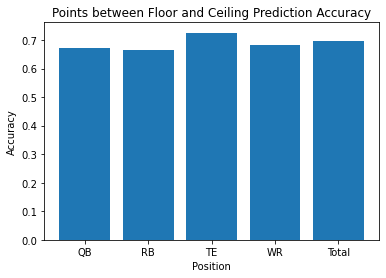

In [29]:
#All Predictions


import matplotlib.pyplot as plt
plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Points between Floor and Ceiling Prediction Accuracy")
print(inRange)

In [30]:
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Ceiling"])
sevenYearStats.loc[truth5, :]
print(sum(truth5)/len(truth5))

0.20758218451749735


In [31]:
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Floor"])
sevenYearStats.loc[truth5, :]
print(sum(truth5)/len(truth5))

0.09544008483563096


[0.6527777777777778, 0.5125348189415042, 0.5527777777777778, 0.5347222222222222]


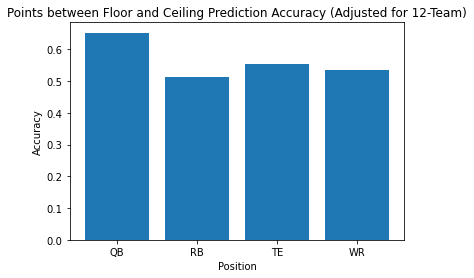

In [32]:
#12-Team Accurate Prediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Floor"]) & (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Ceiling"])

truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 24)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 60)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 60)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 24)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Points between Floor and Ceiling Prediction Accuracy (Adjusted for 12-Team)")
print(inRange)

[0.6916666666666667, 0.51, 0.56, 0.5416666666666666]


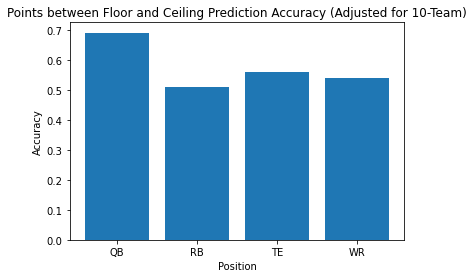

In [33]:
#10-Team Accurate Prediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Floor"]) & (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Ceiling"])

truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 20)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 50)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 50)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 20)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Points between Floor and Ceiling Prediction Accuracy (Adjusted for 10-Team)")
print(inRange)

[0.6770833333333334, 0.5208333333333334, 0.6041666666666666, 0.5625]


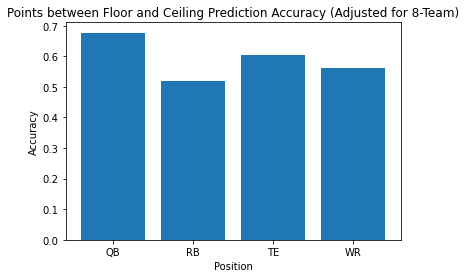

In [34]:
#8-Team Accurate Prediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Floor"]) & (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Ceiling"])

truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 16)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 40)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 40)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 16)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Points between Floor and Ceiling Prediction Accuracy (Adjusted for 8-Team)")
print(inRange)

[0.10416666666666667, 0.25069637883008355, 0.2111111111111111, 0.24305555555555555]


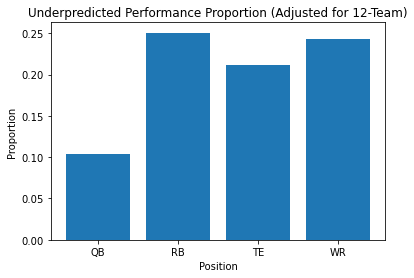

In [35]:
#12-Team Underprediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Ceiling"])

truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 24)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 60)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 60)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 24)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Proportion")
plt.title("Underpredicted Performance Proportion (Adjusted for 12-Team)")
print(inRange)

[0.058333333333333334, 0.24, 0.19666666666666666, 0.24166666666666667]


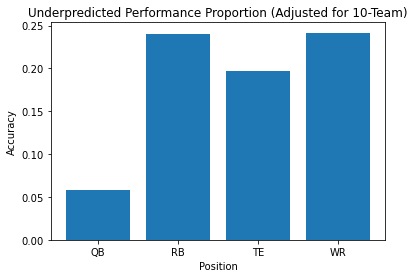

In [127]:
#10-Team Underprediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Ceiling"])

truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 20)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 50)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 50)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 20)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Underpredicted Performance Proportion (Adjusted for 10-Team)")
print(inRange)

[0.07291666666666667, 0.225, 0.17083333333333334, 0.22916666666666666]


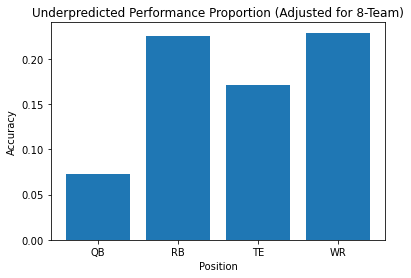

In [128]:
#8-Team Underprediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] > sevenYearStats.loc[:, "Ceiling"])

truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 16)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 40)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 40)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 16)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Underpredicted Performance Proportion (Adjusted for 8-Team)")
print(inRange)

[0.24305555555555555, 0.23676880222841226, 0.2361111111111111, 0.2222222222222222]


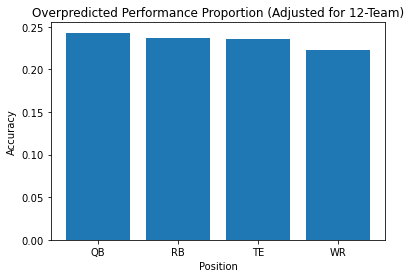

In [130]:
#12-Team Underprediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Floor"])
truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 24)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 60)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 60)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 24)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Overpredicted Performance Proportion (Adjusted for 12-Team)")
print(inRange)

[0.25, 0.25, 0.24333333333333335, 0.21666666666666667]


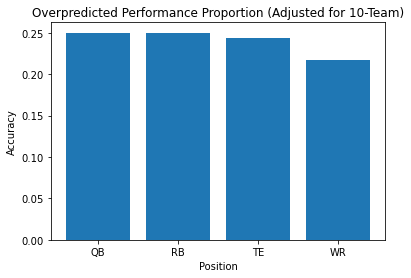

In [131]:
#10-Team Underprediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Floor"])
truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 20)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 50)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 50)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 20)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Overpredicted Performance Proportion (Adjusted for 10-Team)")
print(inRange)

[0.25, 0.25416666666666665, 0.225, 0.20833333333333334]


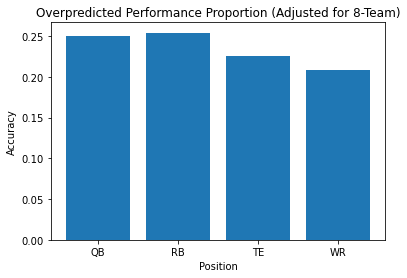

In [132]:
#8-Team Underprediction Percentage

inRange = []
total = ["QB", "RB", "TE", "WR"]
truth5 = (sevenYearStats.loc[:, "NextYearAvgFantasyPoints"] < sevenYearStats.loc[:, "Floor"])
truth6 = (sevenYearStats.loc[:, "Position"] == "QB") & (sevenYearStats.loc[:, "Rank"] <= 16)
truthQB = truth5 & truth6
inRange.append(sum(truthQB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "RB") & (sevenYearStats.loc[:, "Rank"] <= 40)
truthRB = truth5 & truth6
inRange.append(sum(truthRB)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "WR") & (sevenYearStats.loc[:, "Rank"] <= 40)
truthWR = truth5 & truth6
inRange.append(sum(truthWR)/sum(truth6))

truth6 = (sevenYearStats.loc[:, "Position"] == "TE") & (sevenYearStats.loc[:, "Rank"] <= 16)
truthTE = truth5 & truth6
inRange.append(sum(truthTE)/sum(truth6))

import matplotlib.pyplot as plt

plt.bar(total, inRange)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.title("Overpredicted Performance Proportion (Adjusted for 8-Team)")
print(inRange)